<h1 align="center">Machine Learning Project</h1>
<h3 align="center">Predicting Heart Disease</h3>
<h3 align="center">Vladyslav Honcharuk</h3>

The main goal of my project is to predict whether patient has low or high likelihood of heard disease occurance.
As a dataset I will be using the dataset named "Cleveland Heart Disease Dataset", which comes from a study conducted in 1988 and originates from the UCI Machine Learning Repository. 

There are 14 attributes with instances (values in brackets)

age. The age of the patient.

sex. The gender of the patient. (1 = male, 0 = female).

cp. Type of chest pain. (1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic).

trestbps. Resting blood pressure in mmHg.
chol. Serum Cholestero in mg/dl.

fbs. Fasting Blood Sugar. (1 = fasting blood sugar is more than 120mg/dl, 0 = otherwise).

restecg. Resting ElectroCardioGraphic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hyperthrophy).

thalach. Max heart rate achieved.

exang. Exercise induced angina (1 = yes, 0 = no).

oldpeak. ST depression induced by exercise relative to rest.

slope. Peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).

ca. Number of major vessels (0–3) colored by flourosopy.

thal. Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect).

num. Diagnosis of heart disease (0 = absence, 1, 2, 3, 4 = present).

The last attribute num is the one I will try to predict. I am supposed to provide a probability between 0 and 4 describing how confident my model is in predicting whether or not a patient is likely to have a heart disease.

The project is made in Python, because this high-level language is one of the best programming languages to conduct a Machine Learning study.
I will start with importing all the necessary libraries for making plots, doing complex calculations and building ML models, because standart Python library doesn't contain all this features.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')


I changed a little bit the original dataset, so that is easier to import it to the python workflow. I added the names of attributes in the first row of heart_disease_database.csv file, which contains the dataset I will be using. Also all the missing values in dataset were represented by question mark '?' and to make it more easier for me to process data I replaced question marks with NaN ( not a number) values, which are standart when working with missing values in python.

Below I defined columns for future use, imported a dataset, which will be stored as a DataFrame object, which is used in pandas library for storing 2D data structures. And displayed what the dataset looks like by showing first 5 and last 5 instances.

In [2]:
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
df = pd.read_csv("heart_disease_database.csv")

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


It is good to know some insights from your data, like datatypes, shape of the dataset, and statistical info about values of each attribute.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Then I should check for the NaN values to decide what to do with them. As there is only 6 missing values in the whole dataset I decided to replace this values with a mean values of the attribute which contains this value.

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [6]:
df.isna().sum().sum()

6

In [7]:
df["ca"].fillna(df["ca"].mean(), inplace=True)
df["thal"].fillna(df["thal"].mean(), inplace=True)

In [8]:
df.isna().sum().sum()

0

In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

I made all the replacing work, now I will check if there is any duplicate rows in a dataset, which could mess up the statistical models.

In [10]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows : ", duplicate_rows.shape[0])

Number of duplicate rows :  0


There is no duplicate rows, so next I will check for outliers.

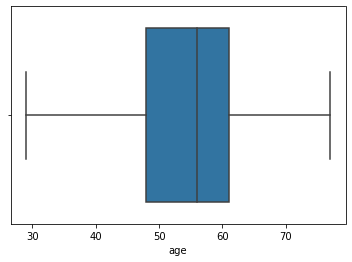

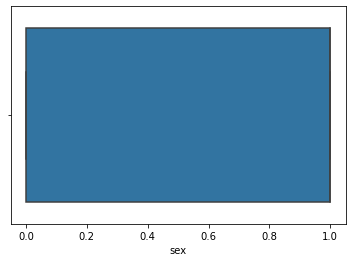

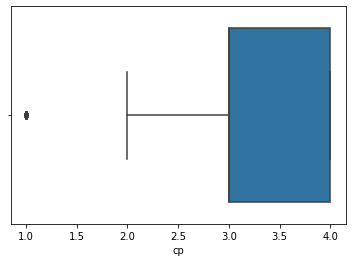

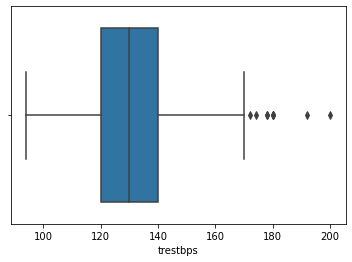

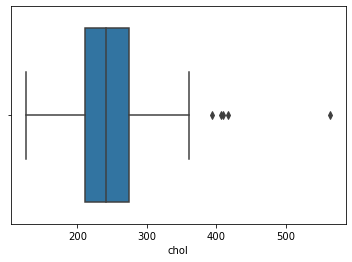

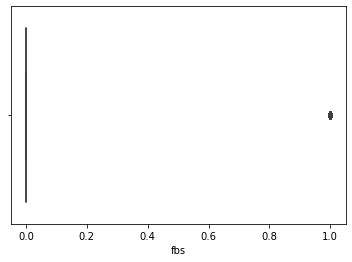

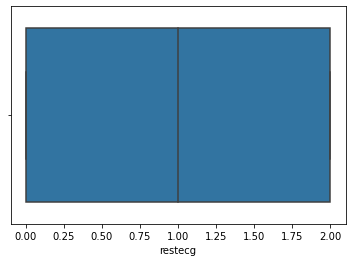

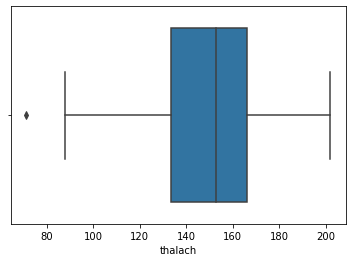

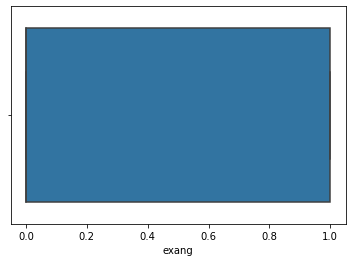

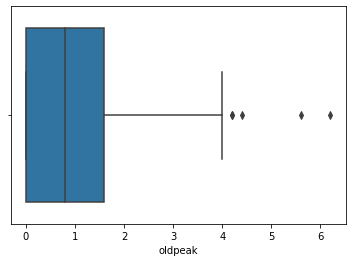

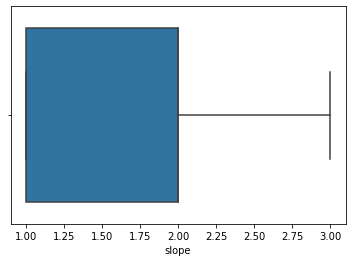

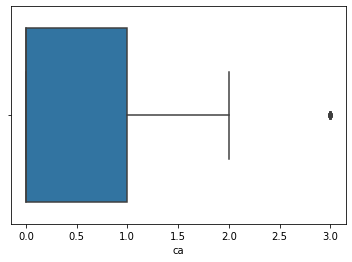

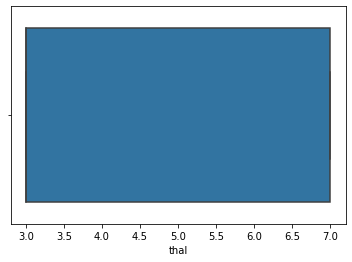

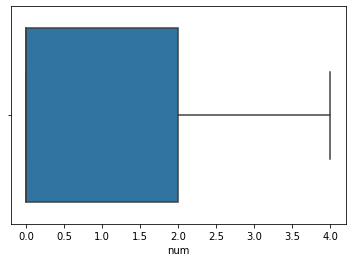

In [11]:
def find_outliers():
    for element in columns:
        plt.figure()
        sns.boxplot(x=df[f"{element}"])

find_outliers()

It seems that there is a bunch of outliers which could mess up the performance of models. I decided to use a Z-score, which is a great technic for removing outliers.

In [12]:
z = np.abs(stats.zscore(df))
df = df[(z<3).all(axis=1)]

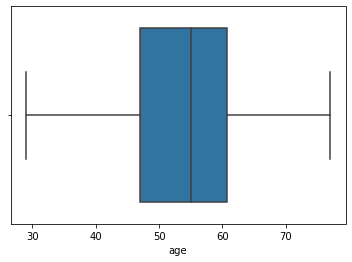

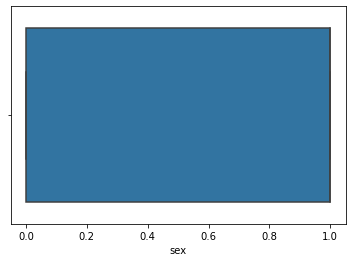

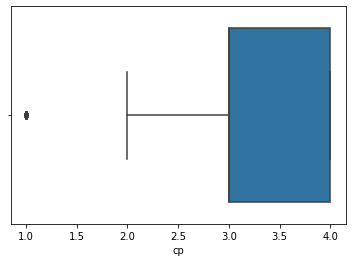

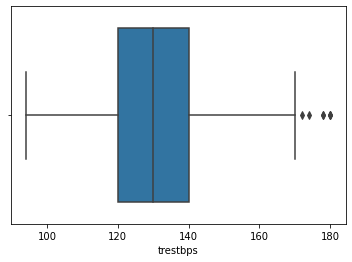

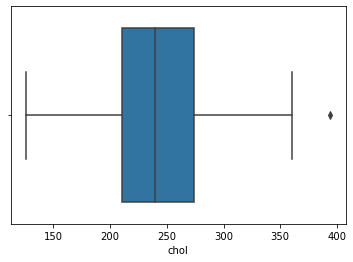

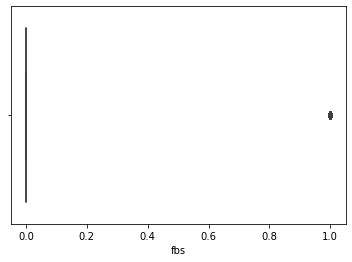

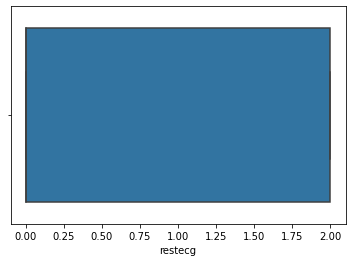

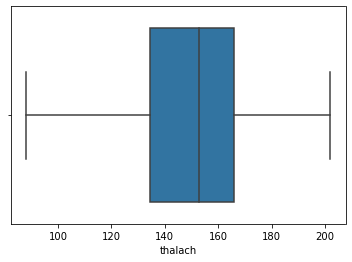

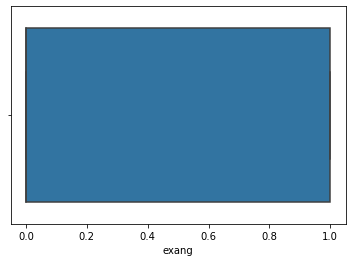

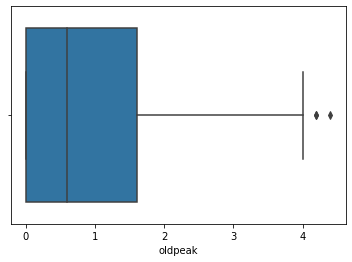

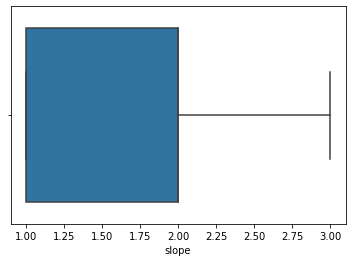

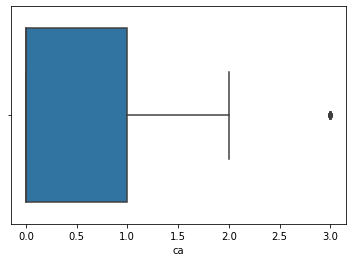

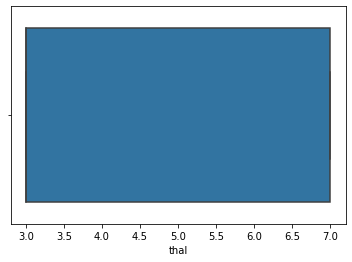

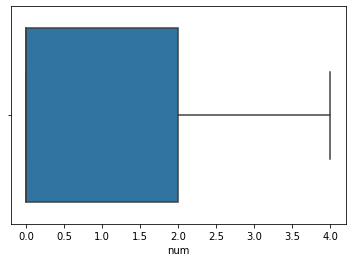

In [13]:
find_outliers()

In [14]:
df.shape

(294, 14)

After normalization 9 instances were deleted. I also replaced the values 2, 3, and 4 in predicted class for 1, because I had problems with multiple classes and simplifying the predicted class attribute eased the task for me.

In [15]:
df["num"].replace(to_replace=[2, 3, 4], value = 1, inplace=True)

A also decided to find the correlation between variables to define the attributes which have low correlation with the predicted class, so I could improve my future ML models. I used Pearson Correlation function.

Text(0.5, 1.0, 'Pearson Correlation')

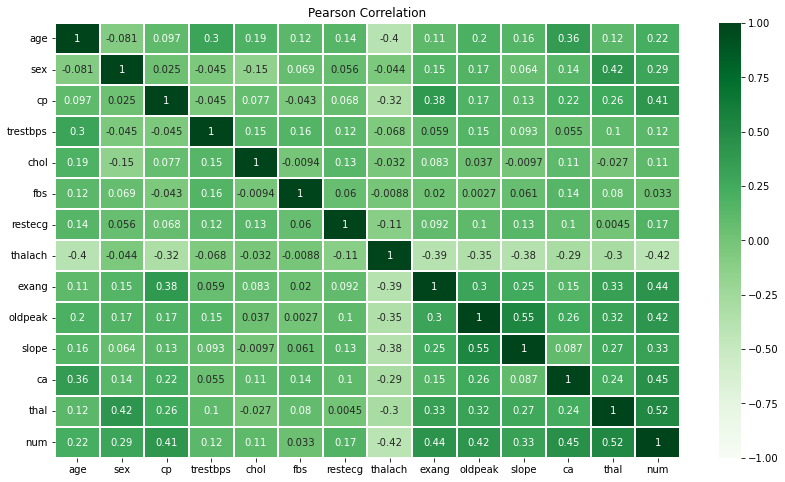

In [16]:
pearsonCorr = df.corr(method='pearson')
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Greens", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")

This is how the dataset looks like after the cleaning process.

In [17]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.000000,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.000000,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.000000,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.000000,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.000000,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.000000,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.000000,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.000000,3.0,1


I created a Model() function to decrease the amount of redandant code, this function could be used for simple ML models which don't take any attributes. I will outline that the division of the whole data into training and testing sets is made with the balanced predicted class for real life application. After evaluation of each classifying ML model I will show the accuracy, confusion matrix and some other characteristics.

In [18]:
def Model(classifier, name_of_classifier, features, target, training_size=0.75, random_state=0):
    training_features, testing_features, training_target, testing_target = train_test_split(features, target, train_size=training_size, stratify=target, random_state=random_state)
    
    print(f"{name_of_classifier} classifier:\n")
    print(f"Shape of training features: {training_features.shape}")
    print(f"Shape of training target: {training_target.shape}")
    print(f"Shape of testing features: {testing_features.shape}")
    print(f"Shape of testing target: {testing_target.shape}\n")
    
    classifier.fit(training_features, training_target)
    predicted_target = classifier.predict(testing_features)
    score = accuracy_score(testing_target, predicted_target)
    print(f"Accuracy = {score}\n")
    print(classification_report(predicted_target, testing_target))
    
    print("Confusion matrix:")
    
    conmat = confusion_matrix(testing_target, predicted_target)

    val = np.mat(conmat) 

    df_cm = pd.DataFrame(val, index=[0, 1])

    plt.figure()

    heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha="right")
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha="right")

    plt.ylabel("True label")
    plt.xlabel("Predicted label")

    plt.title(f"{name_of_classifier} Model Results")

    plt.show()    

In [19]:
features_labels = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
           "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
features = df.loc[:, features_labels]
target = df.loc[:, ["num"]]

training_size = 0.66
random_state = 2

I have chosen a size of training set = 66%, which I found the best while making ML models.

The first classifier I implemented is ZeroR which stands for Zero Rule, it looks for the most frequent predicted class. It is useful because it's accuracy is a baseline for every other classifier and I decided to model it first to see how much more complex classifiers are better.

ZeroR classifier:

Shape of training features: (194, 13)
Shape of training target: (194, 1)
Shape of testing features: (100, 13)
Shape of testing target: (100, 1)

Accuracy = 0.55

              precision    recall  f1-score   support

           0       1.00      0.55      0.71       100
           1       0.00      0.00      0.00         0

    accuracy                           0.55       100
   macro avg       0.50      0.28      0.35       100
weighted avg       1.00      0.55      0.71       100

Confusion matrix:


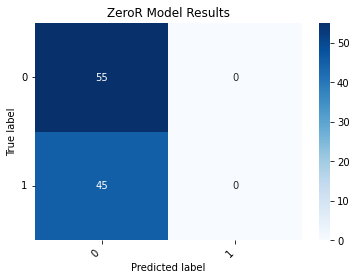

In [20]:
zeror = DummyClassifier(strategy="most_frequent")
name_of_classifier = "ZeroR"

Model(zeror, name_of_classifier, features, target, training_size=training_size, random_state=random_state)    

Then goes k-Nearest Neighbors classifier with 4 neighbors, which is not a complex one, but has a much better accuracy than ZeroR.

k-Nearest Neighbors classifier:

Shape of training features: (194, 13)
Shape of training target: (194, 1)
Shape of testing features: (100, 13)
Shape of testing target: (100, 1)

Accuracy = 0.7

              precision    recall  f1-score   support

           0       0.85      0.68      0.76        69
           1       0.51      0.74      0.61        31

    accuracy                           0.70       100
   macro avg       0.68      0.71      0.68       100
weighted avg       0.75      0.70      0.71       100

Confusion matrix:


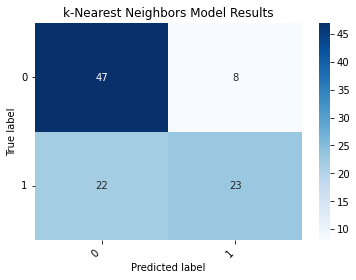

In [21]:
KNN = KNeighborsClassifier(n_neighbors=4)
name_of_classifier = "k-Nearest Neighbors"

Model(KNN, name_of_classifier, features, target, training_size=training_size, random_state=random_state)

Because there is a need to specify the number of neighbors to run the k-Nearest Neighbors classifier I decided to check which number of nearest neighbors will be the best for this exact event.

Minimum error: 0.27 at K = 2


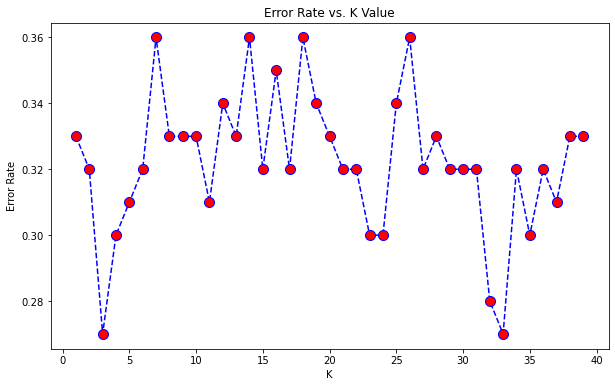

In [22]:
training_features, testing_features, training_target, testing_target = train_test_split(features, target, train_size=training_size, stratify=target, random_state=random_state)
t = testing_target.squeeze()

error_rate = []
for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(training_features,training_target)
    predicted_target = KNN.predict(testing_features)
    error_rate.append(np.mean(predicted_target != t))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy: 0.73 at K = 2


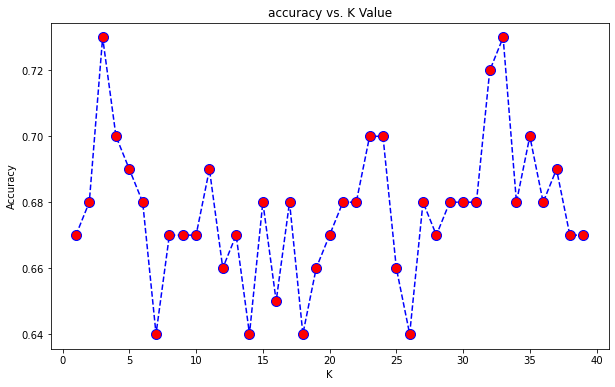

In [23]:
accuracy = []

for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors = i).fit(training_features,training_target)
    predicted_target = KNN.predict(testing_features)
    accuracy.append(accuracy_score(testing_target, predicted_target))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(accuracy),"at K =",accuracy.index(max(accuracy)))

I found out that with k=2 the model shows the best result and accuracy = 73%.

Then I decided to run the Support Vector Classifier, which is frequently implemented along the kNN. I foud out that the accuracy of SVC is equals the accuracy of a baseline, so I can't say that the version of SVC classifier is useful in this situation.

Support Vector classifier:

Accuracy: 0.55
              precision    recall  f1-score   support

           0       1.00      0.55      0.71       100
           1       0.00      0.00      0.00         0

    accuracy                           0.55       100
   macro avg       0.50      0.28      0.35       100
weighted avg       1.00      0.55      0.71       100

Confusion matrix:


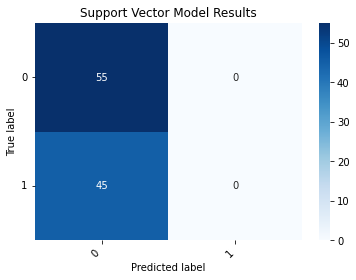

In [24]:
name_of_classifier = "Support Vector"
print(f"{name_of_classifier} classifier:\n")
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(training_features,training_target)

rbf_pred = rbf.predict(testing_features)

rbf_accuracy = accuracy_score(testing_target, rbf_pred)
print(f"Accuracy: {rbf_accuracy}")

print(classification_report(rbf_pred, testing_target))

print("Confusion matrix:")

conmat = confusion_matrix(testing_target, rbf_pred)

val = np.mat(conmat) 

df_cm = pd.DataFrame(val, index=[0, 1])

plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha="right")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha="right")

plt.ylabel("True label")
plt.xlabel("Predicted label")

plt.title(f"{name_of_classifier} Model Results")

plt.show()    

I created two versions of Logistic Regression Models. One with all the attributes and one with attributes with high correlation. I removed this attributes: "trestbps", "chol", "fbs", "restecg", which have low correlation with the predicted class. And I got a much better performance in the form of 6% - 84% compared to 90%.

Logistic Regression classifier:

Shape of training features: (194, 13)
Shape of training target: (194, 1)
Shape of testing features: (100, 13)
Shape of testing target: (100, 1)

Accuracy = 0.84

              precision    recall  f1-score   support

           0       0.87      0.84      0.86        57
           1       0.80      0.84      0.82        43

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100

Confusion matrix:


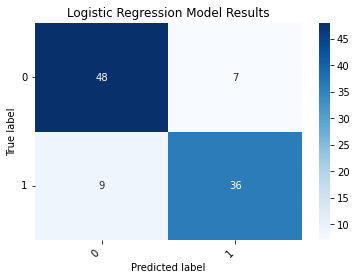

In [25]:
LogR = LogisticRegression(max_iter=10000)
name_of_classifier = "Logistic Regression"

Model(LogR, name_of_classifier, features, target, training_size=training_size, random_state=random_state)  

Logistic Regression classifier:

Shape of training features: (194, 9)
Shape of training target: (194, 1)
Shape of testing features: (100, 9)
Shape of testing target: (100, 1)

Accuracy = 0.9

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        57
           1       0.87      0.91      0.89        43

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100

Confusion matrix:


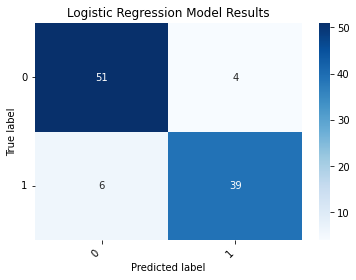

In [26]:
features_labels_filtered = ["age", "sex", "cp", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
LogR_f = LogisticRegression(max_iter=10000)
name_of_classifier = "Logistic Regression"
features_filtered = df.loc[:, features_labels_filtered]

Model(LogR_f, name_of_classifier, features_filtered, target, training_size=training_size, random_state=random_state)  

Though Logistic Regression is better in this situation, I also decided to implement the Linear Regression, and I got 85% accuracy.

In [27]:
LR = LinearRegression()
name_of_classifier = "Linear Regression"

training_features, testing_features, training_target, testing_target = train_test_split(features, target, train_size=training_size, stratify=target, random_state=random_state)
    
print(f"{name_of_classifier} classifier:\n")
print(f"Shape of training features: {training_features.shape}")
print(f"Shape of training target: {training_target.shape}")
print(f"Shape of testing features: {testing_features.shape}")
print(f"Shape of testing target: {testing_target.shape}\n")

LR.fit(training_features, training_target)
predicted_target = LR.predict(testing_features)
score = accuracy_score(testing_target, predicted_target.round())
print(f"Accuracy = {score}\n")
print(f"Mean squared error: {mean_squared_error(testing_target, predicted_target)}")

Linear Regression classifier:

Shape of training features: (194, 13)
Shape of training target: (194, 1)
Shape of testing features: (100, 13)
Shape of testing target: (100, 1)

Accuracy = 0.85

Mean squared error: 0.1388706674635264


I was surprised when I saw such a low accuracy from a Decision Tree Classifier, which has 70% accuracy with all the attributes and 77% with attributes with high correlation.

Decision Tree classifier:

Shape of training features: (194, 13)
Shape of training target: (194, 1)
Shape of testing features: (100, 13)
Shape of testing target: (100, 1)

Accuracy = 0.7

              precision    recall  f1-score   support

           0       0.64      0.78      0.70        45
           1       0.78      0.64      0.70        55

    accuracy                           0.70       100
   macro avg       0.71      0.71      0.70       100
weighted avg       0.71      0.70      0.70       100

Confusion matrix:


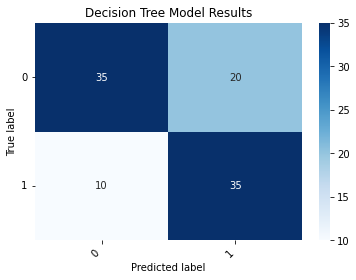

In [28]:
DT = tree.DecisionTreeClassifier(random_state=0)
name_of_classifier = "Decision Tree"

Model(DT, name_of_classifier, features, target, training_size=training_size, random_state=random_state)

Decision Tree classifier:

Shape of training features: (194, 9)
Shape of training target: (194, 1)
Shape of testing features: (100, 9)
Shape of testing target: (100, 1)

Accuracy = 0.77

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        58
           1       0.71      0.76      0.74        42

    accuracy                           0.77       100
   macro avg       0.76      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100

Confusion matrix:


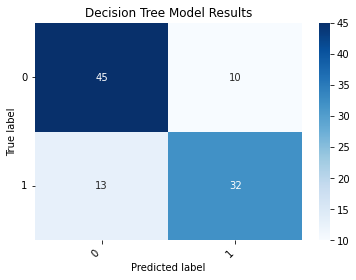

In [29]:
DT = tree.DecisionTreeClassifier(random_state=0)
Model(DT, name_of_classifier, features_filtered, target, training_size=training_size, random_state=random_state)

Then goes a Random Forest Classifier, which is the most complex classifier of all the classifiers I implemented. And It has a great accuracy of 90%.

Random Forest classifier:

Shape of training features: (194, 13)
Shape of training target: (194, 1)
Shape of testing features: (100, 13)
Shape of testing target: (100, 1)

Accuracy = 0.9

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        59
           1       0.84      0.93      0.88        41

    accuracy                           0.90       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100

Confusion matrix:


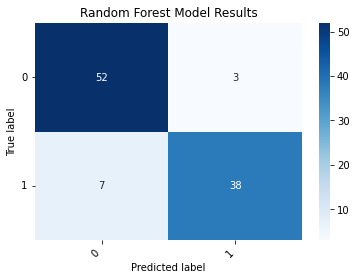

In [30]:
RF = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=500)
name_of_classifier = "Random Forest"

Model(RF, name_of_classifier, features, target, training_size=training_size, random_state=random_state)

And the last but not the least classifier is Naive Bayes Classifier which should have the best accuracy based on the information that I have read throughout the Internet. And it shows also the 90% accuracy and its accuracy does not depend on the amount of attributes. So the accuracy stays the same.

Naive Bayes classifier:

Shape of training features: (194, 13)
Shape of training target: (194, 1)
Shape of testing features: (100, 13)
Shape of testing target: (100, 1)

Accuracy = 0.9

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        57
           1       0.87      0.91      0.89        43

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100

Confusion matrix:


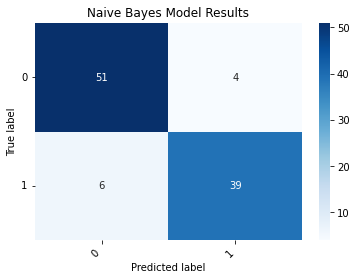

In [31]:
NB = GaussianNB()
name_of_classifier = "Naive Bayes"

Model(NB, name_of_classifier, features, target, training_size=training_size, random_state=random_state)

Naive Bayes classifier:

Shape of training features: (194, 9)
Shape of training target: (194, 1)
Shape of testing features: (100, 9)
Shape of testing target: (100, 1)

Accuracy = 0.9

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        57
           1       0.87      0.91      0.89        43

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100

Confusion matrix:


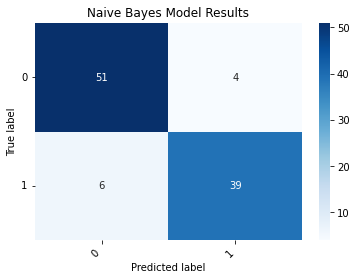

In [32]:
Model(NB, name_of_classifier, features_filtered, target, training_size=training_size, random_state=random_state)

A measured accuracies of all the models and there is no one winner in this contest.
The first place take Decision Tree, Naive Bayes and Logistic Regression without low correlation attributes Classifiers
which have accuarcy of 90%.

In my project I cleaned the heart disease dataset and implemented different classification Machine Learning models to predict whether a certain patient is likely to have a heart disease. Best of the classifiers show the accuracy of 90%, which is quite good nowadays, but it is not a 100% accurate models, and they can't be solely used to predict a heart disease of a person because it has 10% error, and 10 people out of 100 will get their prediction wrong. So I would recommend using this classifiers only with the supervisors recheck.